# Final Project
*Group 4*

## Abstract

*About 17.3 million people in the United States have had at least one major depressive episode according to the National Institute of Mental Health. One of the key neurotransmitters associated with depression is dopamine. In this study, we plan to investigate the role of downstream projections of dopamine receptor expressing neurons in the nucleus accumbens (NAc) to better understand the circuitry that gives rise to the different phenotypes associated with depression.*

## Research Question

*What are the major connections, based on normalised projection density, of dopamine receptor 1 (D1) and dopamine receptor 2 (D2) to different brain regions from the NAc that are involved in the various phenotypes of depression? What is the excitatory to inhibitory ratio of inputs that these brain regions receive based on the AMPA/GABAA data? How does this help us explain the phenotypes associated with depression?*

# Background and Prior Work

The D1 and D2 neurons of the NAc projecting to different brain regions are medium spiny neurons (MSNs) that are also GABAergic (Soares-Cunha, Carina, et al.). This suggests that when these neurons are activated, they suppress the brain region they are projecting to. From prior work by Chase et.al., the excitatory input to the D1 MSN decreases and D2 MSN increases in depressed animals. Hence, D2 takes over D1 in the regions that receive projections from both neuron types in depressed animals. We looked at the mouse connectivity dataset to examine the brian regions that were receiving projections from D1 and D2 neurons of the NAc. We further looked at normalised projection volume which reflected the projection a brain region was receiving normalised to the injection site volume. This allowed us to compare the projection strength of the D1 and D2 neurons to the brain regions of interest. The mouse connectivity dataset was obtained by injecting an anterograde tracer in the NAc of D1 and D2 mice to selectively mark the brain regions receiving projections. There was data from three animals in D1 mice and from two animals in D2 mice that was averaged together. To generally determine if the projections the brain region was receiving were majorly excitatory or inhibitory, we looked at the AMPA/GABAA ratio. We used these receptors for excitatory and inhibitory as Zhang et. al. The Allen Brain Atlas in-situ mouse data was used to look at the expression of these receptors and calculate the e/i ratio. There were specific probes that were used that selectively bind the mRNA of AMPA receptors (excitatory receptors) and GABAA receptors (inhibitory receptors). The fluorescence ratio of these were then calculated to determine the strength of excitatory input to that of inhibitory input. 

Sharp et. al. showed that the basolateral amygdala, part of the cortical plate has been involved in fear and anxiety related disorders and overactivity of this region can lead to depression as demonstrated by the stress-induced depression model shown by Lim et.al. Michelsen, K, et al. shows that neural plasticity in the dorsal raphe potentially leads to major depression. Ring et. al. also demonstrates effectively the increased pain sensitivity in depressed patients. The ventral pallidum (VP) circuitry involved in depression is largely unknown as demonstrated by Knowland et.al. They mention that the VP receives strong inputs from the D1 and D2 MSNs and each are involved in one or the other aspect of depressive behavior (Creed et.al.). Li et.al. points out another phenotype of depressed patients which is decreased color perception. 





## Data References (*Academic bibliography at the end of the notebook*):

Example paper using connectivity dataset:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6372022/

Example connectivity code:

https://alleninstitute.github.io/AllenSDK/_static/examples/nb/mouse_connectivity.html

https://github.com/AllenBrainAtlas/SWDB-2016/blob/master/DynamicBrain/solutions/Connectivity_solutions.ipynb

Mouse connectivity documentation:

https://allensdk.readthedocs.io/en/latest/allensdk.core.mouse_connectivity_cache.html

https://alleninstitute.github.io/AllenSDK/connectivity.html

http://connectivity.brain-map.org/

Mouse Atlas documentation:

https://allensdk.readthedocs.io/en/latest/allensdk.api.queries.mouse_atlas_api.html

plotting aides:

https://matplotlib.org/3.1.1/tutorials/index.html

https://stackoverflow.com/

MANOVA aides:

https://stats.idre.ucla.edu/sas/output/manova/

https://www.statisticshowto.datasciencecentral.com/wilks-lambda/




## Hypothesis


We hypothesize that the different connectivity of D1 and D2 cells of the NAc to these important brain regions involved in the various phenotypes of depression will explain how the change in activities of D1 and D2 neurons impart these symptoms of depression. We think this is the case because in depression, D1 neurons have decreased excitatory synaptic input, while D2 have increased excitatory synaptic input (Chase et. al.). These effects on the D1 and D2 neurons could potentially have effects on the downstream brain regions giving rise to the various depressive phenotypes, such as, persistent sadness, changes in appetite, etc. The differences in the AMPA/GABAA ratio would provide us an idea about the general excitatory and inhibitory inputs that the brain region of interest is receiving. 

Looking into the strength of the D1/D2 neuronal connections could potentially indicate a regulatory aspect of said neurons.

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

>   pip install statsmodel --upgrade --user   <

This is necessary as the DataHub's version of statsmodel has a bug and will crash when trying to run MANOVA.

The mouse connectivity data was pulled from Allen Brain Atlas into Python. The experiments for D1 (Drd1a-Cre_EY26) mice and D2 (Drd2-Cre_ER44) mice with an anterograde tracer in the NAc were used. Only the normalised_projection_volume was examined for the different brain regions, which refers to the projection volume in the downstream structures normalised to the injection volume. Because this is normalised to allow for comparison between different experiments, we compared these values for various brain regions of interest between these cre-lines. We also looked at in-situ data from Allen brain atlas to calculate the AMPA/GABAA ratio. The expression of AMPA and GABAA receptors was pulled for the brain regions of interest and the ratio was calculated. This ratio serves as a good indicative of what the major excitatory and inhibitory inputs 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
manifest = 'connectivity/mouse_connectivity_manifest.json'
mcc = MouseConnectivityCache(manifest_file=manifest)
structure_tree = mcc.get_structure_tree()


import urllib.request # default library for requesting data from URLs
import xml.etree.ElementTree as ET
import io

## Data Wrangling

These are the structures (parents and children) that we are examining. They were chosen by browsing research done on the effects of depression on a variety of structures, and chosing eight to apply to our analysis. These eight brain regions belong to 5 major brain divisions.

"We also expect the connectivity could change sharply between the boundaries of high-level brain structures. For example, we know that projections arising from the thalamus and hypothalamus can be very different, even though some areas within these divisions are near each other at the borders. To account for this, we chose a partition of the brain into 12 nonoverlapping major brain divisions or coarse structures defined in the CCF. The major brain divisions are isocortex, olfactory areas, hippocampal formation, cortical subplate, striatum, pallidum, thalamus, hypothalamus, midbrain, pons, medulla, and cerebellum"(Knox). 

From Knox, we decided that it would be appropriate to make comparisons between the major divisons because projections are known to be very different between these divisions. We decided to assume that the differences can be generalized to within the parent structures. 

Another reason to only make our imporant comparisons pertaining to the major divisions is due to the restrictions from the Allen ISH Mouse Atlas data. The resolution of expression data from them is at the major division level, therefore it will be to our benefit to stay at this level of resolution. However, we are still examining connectivity projection values of the child structures to stay true to the actual structures that were chosen in the first place and to preserve the differences that may be observed between D1 and D2 at the higher resolution.


Isocortex = 315
- VIS = 669

Cortical Subplate = 703
- Basolateral Amygdala = 295

Pallidum = 803
- Pallidum, ventral region = 835
- Substantia innominata = 342

Hypothalamus = 1097
- Periventricular nucleus = 38
- Parastrial nucleus = 1109
- Parasubthalamic nucleus = 364

Midbrain = 313
- Dorsal nucleus raphe = 872

Here we examine mouse connectivity of viral injections at the accumbens (abbreviated as ACB in the SDK, is referenced by name or by NAc in publications and in our discussion) in Drd1a-Cre_EY26 and Drd2-Cre_ER44 transgenic lines. We will refer to Drd1a-Cre_EY26 and Drd2-Cre_ER44 transgenic lines as D1 or D1R and D2 or D2R from here on out.

The goal of this bloc of text is to grab, merge, and clean up projection data from the connectivity dataset. We are only concerned with normalized_projection_volume, which is the projection volume to downstream regions normalized by injection volume of each experiment. This way, we allow ourselves to compare the means of projection values to choice structures across all experiments. Three experiements were done for D1 and two were done for D2.

structure_id, structure_name, and structure_acronym are preserved to grab the structures we will examine while preserving relevant info for the structures. D1_npv and D2_npv are the corresponding normalized projection volumes. D1-D2_npv is the delta normalized projection volume.

In [38]:
# retrieve structure information for accumbens
accumbens_id = structure_tree.get_structures_by_acronym(['ACB'])[0]['id']

# get experiments by cre line and injection structure
drd1 = pd.DataFrame(mcc.get_experiments(cre=[ 'Drd1a-Cre_EY262' ], injection_structure_ids=[accumbens_id]))
drd1_unionizes = mcc.get_structure_unionizes(drd1['id'],is_injection=False,hemisphere_ids=[3])

drd2 = pd.DataFrame(mcc.get_experiments(cre=[ 'Drd2-Cre_ER44' ], injection_structure_ids=[accumbens_id]))
drd2_unionizes = mcc.get_structure_unionizes(drd2['id'],is_injection=False,hemisphere_ids=[3])

both_df = drd1.append(drd2).reset_index()[['transgenic_line','id']]
both_df.columns = ['transgenic_line','experiment_id']

# add in transgenic_line and remove columns we are not concerned with
both_df = drd1_unionizes.append(drd2_unionizes).reset_index().merge(both_df, on='experiment_id').drop('index',axis=1)

dataset = both_df[['transgenic_line','structure_id', 'normalized_projection_volume']].groupby(
    ['structure_id','transgenic_line'])['normalized_projection_volume'].mean().reset_index()


df = pd.DataFrame()
df['structure_id']= dataset['structure_id'].unique()
df['D1_npv'] = dataset[dataset.transgenic_line == "Drd1a-Cre_EY262"].reset_index()['normalized_projection_volume']
df['D2_npv'] = dataset[dataset.transgenic_line == "Drd2-Cre_ER44"].reset_index()['normalized_projection_volume']
dataset = df

# # attach structure names and acronyms
dataset['structure_name'] = pd.DataFrame(structure_tree.nodes(dataset['structure_id']))['name']
dataset['structure_acronym'] = pd.DataFrame(structure_tree.nodes(dataset['structure_id']))['acronym']

dataset['D1-D2_npv'] = dataset['D1_npv'] - dataset['D2_npv']
dataset = dataset[['structure_id','structure_name','structure_acronym','D1_npv','D2_npv','D1-D2_npv']]
dataset

,structure_id,structure_name,structure_acronym,D1_npv,D2_npv,D1-D2_npv
0,1,"Tuberomammillary nucleus, ventral part",TMv,0.009671,0.001855,0.007816
1,2,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,0.000224,0.000000,0.000224
2,4,Inferior colliculus,IC,0.000438,0.000008,0.000430
3,6,internal capsule,int,0.009405,0.002433,0.006972
4,7,Principal sensory nucleus of the trigeminal,PSV,0.000142,0.000042,0.000100
...,...,...,...,...,...,...
835,607344850,"Interpeduncular nucleus, intermediate",IPI,0.000260,0.000073,0.000187
836,607344854,"Interpeduncular nucleus, dorsomedial",IPDM,0.000504,0.000067,0.000437
837,607344858,"Interpeduncular nucleus, dorsolateral",IPDL,0.000538,0.000053,0.000484
838,607344862,"Interpeduncular nucleus, rostrolateral",IPRL,0.001796,0.000201,0.001595


The following bloc of code is meant to set up variables to perform a MANOVA test to determine if D1 and D2 normalized projection volumes are statistically significantly different.

The table has to be transposed to cleanly apply to the test.

Running all structures in statsmodel MANOVA fails due to singular matrix (determinant = 0 due to all the structures that do not have any normalized_projection_volume). Therefore, we are limiting our comparisons to the major divisions that are parent structures of our chosen structures and the chosen structures themselves.

In [20]:
both = pd.DataFrame(mcc.get_experiments(cre=[ 'Drd1a-Cre_EY262','Drd2-Cre_ER44' ]
                                           , injection_structure_ids=[accumbens_id]))

both_unionizes = mcc.get_structure_unionizes(both['id'],is_injection=False,hemisphere_ids=[3]
                                             ,structure_ids = [315,703,803,1097,313,
                                                              669,295,835,342,38,1109,364,872])

# set up empty transposed structure_id vs. experiment_id
df_trimmed = both_df[['experiment_id','normalized_projection_volume','structure_id']]
df_redone = pd.DataFrame()
df_redone['experiment_id'] = df_trimmed.experiment_id.unique()
df_redone = df_redone.set_index('experiment_id')
for i in df_trimmed.structure_id.unique():
    df_redone[str(i)] = None
    
for i in df_redone.index:
    for j in df_redone.columns:
        df_redone.loc[i,j] = float(df_trimmed[(df_trimmed.experiment_id == i) & (
            df_trimmed.structure_id == int(j))]['normalized_projection_volume'])
        
acronyms = pd.DataFrame(structure_tree.nodes([int(i) for i in df_redone.columns]))['acronym'].tolist()
df_redone.columns = acronyms
df_redone = df_redone.reset_index()
df_redone = df_redone.merge(both_df[['experiment_id','transgenic_line']].drop_duplicates(), on='experiment_id')
df_redone

,experiment_id,SUV,AUDv1,VIIn,fxpo,P-mot,ZI,mfb,BLAa,IIIn,...,uf,int,VISC6a,NLOT2,PH,MSC,RSPd5,IPC,ICd,transgenic_line
0,170785775,0.000296873,8.48968e-05,1.92355e-05,0.00103152,0.028365,0.00691401,0.01761,0.00657883,0.00225731,...,0.000290626,0.00131761,0.000602855,0.000190964,0.00983299,0.0454563,0.00116364,1.24074e-05,0.000559822,Drd1a-Cre_EY262
1,168615344,4.61375e-05,7.87544e-05,2.28174e-06,0.00677323,0.0460077,0.0374564,0.00628608,0.00908853,0.00165031,...,0.00021599,0.0263445,0.00389013,0.00125237,0.0771184,0.0506805,0.00129417,0.0012551,7.11391e-05,Drd1a-Cre_EY262
2,168614604,5.43653e-05,0.000184735,1.40166e-05,0.00631117,0.0261481,0.019683,0.0104159,0.00206947,0.000639169,...,4.45406e-05,0.000552766,0.000381618,0.000381131,0.0710945,0.0485685,0.00120107,0.00165755,6.57268e-05,Drd1a-Cre_EY262
3,167904966,0,1.89987e-05,0,0.00417755,0.00353188,0.0202375,0.0072169,0.0181423,0.000570754,...,1.32585e-05,0.00466649,0,0.00634971,0.0172558,0.0882209,0,6.73801e-05,6.9901e-07,Drd2-Cre_ER44
4,175732001,8.55344e-07,4.2848e-05,0,0.00486269,0.00118435,0.0115529,0.00204187,4.9818e-06,1.90465e-05,...,5.08153e-06,0.000200382,0,9.82714e-05,0.00514041,0.0277051,0,0.000557716,6.37981e-06,Drd2-Cre_ER44


The following two cells are scraping the web data from the in situ hybridization databse from the Mouse Brain Atlas and deliver the expression energy of each parent structure for specific receptors. The two receptors in question are GABAa receptors and AMPA receptors. Generally, AMPA receptors are excitatory and GABAa receptors are inhibitory, which will be important later on in the notebook. The dataframes shown below each of the following two cells show the expression values for each probes across experiments.

In [21]:

GABA_df = pd.DataFrame()
# constructing the url iteratively for each experiment involving the GABA a receptor
GABAa_experiment_ids = ['69257289', '75551469', '474', '75551482']
for ids in GABAa_experiment_ids:
    url_1 = 'http://mouse.brain-map.org/api/v2/data/query.xml?criteria=model::Structure,rma::criteria,structure_sets%5Bid$eq2%5D,pipe::list%5Bxstructures$eq%27id%27%5D,model::SectionDataSet%5Bid$eq'
    url_2 = '%5D,rma::include,genes,plane_of_section,treatments,specimen(donor(age,organism)),probes(orientation,predicted_sequence,forward_primer_sequence,reverse_primer_sequence),products%5Bid$eq1%5D,model::StructureUnionize,rma::criteria,section_data_set%5Bid$eq'
    url_3 = '%5D,rma::include,structure%5Bid$in$xstructures%5D,rma::options%5Bonly$eqid,section_data_set_id,name,expression_energy,acronym,red,green,blue%5D,model::SectionImage%5Bdata_set_id$eq'
    url_4 = '%5D,rma::include,associates,alternate_images,rma::options%5Border$eq%27sub_images.section_number$asc%27%5D,'
    url = url_1 + ids + url_2 + ids + url_3 + ids + url_4
    ##### end URL construction block #####

    with urllib.request.urlopen(url) as response:
        xml = response.read()
    xml

    energy_values = []
    names = []
    etree = ET.fromstring(xml) #create an ElementTree object 

    for structure_unionizes in etree.findall('structure-unionizes'):
        for structure_unionize in structure_unionizes:
            energy_value = float(structure_unionize.find('expression-energy').text)
            energy_values.append(energy_value)
            name = structure_unionize.find('structure').find('name').text
            names.append(name)
    GABA_df[ids] = energy_values
GABA_df['names'] = names
GABA_df = GABA_df.set_index('names')
GABA_df['names'] = names
GABA_df = GABA_df.drop(['Medulla','Striatum','Thalamus','Olfactory areas','Pons','Hippocampal formation','Cerebellum'])
GABA_df

,69257289,75551469,474,75551482,names
names,,,,,
Midbrain,0.647227,0.349880,5.26445,16.9231,Midbrain
Isocortex,0.413036,0.215812,6.41801,22.7434,Isocortex
Cortical subplate,0.747151,0.721500,4.60358,19.0825,Cortical subplate
Pallidum,2.585050,1.414670,4.87338,12.6482,Pallidum
Hypothalamus,2.436930,1.013040,4.56102,15.5846,Hypothalamus


In [22]:
AMPA_df = pd.DataFrame()
# constructing the url iteratively for each experiment involving the GABA a receptor
AMPA_experiment_ids = ['79591719', '81790722', '68924793', '70919471', '75551462', '69257701', '71247616', '68844654', '71358628']
for ids in AMPA_experiment_ids:
    
    url_1 = 'http://mouse.brain-map.org/api/v2/data/query.xml?criteria=model::Structure,rma::criteria,structure_sets%5Bid$eq2%5D,pipe::list%5Bxstructures$eq%27id%27%5D,model::SectionDataSet%5Bid$eq'
    url_2 = '%5D,rma::include,genes,plane_of_section,treatments,specimen(donor(age,organism)),probes(orientation,predicted_sequence,forward_primer_sequence,reverse_primer_sequence),products%5Bid$eq1%5D,model::StructureUnionize,rma::criteria,section_data_set%5Bid$eq'
    url_3 = '%5D,rma::include,structure%5Bid$in$xstructures%5D,rma::options%5Bonly$eqid,section_data_set_id,name,expression_energy,acronym,red,green,blue%5D,model::SectionImage%5Bdata_set_id$eq'
    url_4 = '%5D,rma::include,associates,alternate_images,rma::options%5Border$eq%27sub_images.section_number$asc%27%5D,'
    url = url_1 + ids + url_2 + ids + url_3 + ids + url_4
    ##### end URL construction block #####

    with urllib.request.urlopen(url) as response:
        xml = response.read()
    xml

    energy_values = []
    names = []
    etree = ET.fromstring(xml) #create an ElementTree object 

    for structure_unionizes in etree.findall('structure-unionizes'):
        for structure_unionize in structure_unionizes:
            energy_value = float(structure_unionize.find('expression-energy').text)
            energy_values.append(energy_value)
            name = structure_unionize.find('structure').find('name').text
            names.append(name)
    AMPA_df[ids] = energy_values
    
    
AMPA_df['names'] = names
AMPA_df = AMPA_df.set_index('names')
AMPA_df['names'] = names
AMPA_df = AMPA_df.drop(['Medulla','Striatum','Thalamus','Olfactory areas','Pons','Hippocampal formation','Cerebellum'])
AMPA_df

,79591719,81790722,68924793,70919471,75551462,69257701,71247616,68844654,71358628,names
names,,,,,,,,,,
Midbrain,10.0788,8.1840,15.5117,14.6156,18.8934,10.25570,9.09271,13.68040,16.0388,Midbrain
Isocortex,18.3264,13.9538,25.3041,25.1265,29.3327,22.14740,21.26720,15.80430,18.4240,Isocortex
Cortical subplate,24.8909,23.1051,27.5710,26.1875,30.8842,22.45850,21.82060,14.02190,16.7260,Cortical subplate
Pallidum,13.6717,14.7791,18.6291,17.7289,19.9659,11.21800,14.24610,9.81192,12.8131,Pallidum
Hypothalamus,16.1888,12.0956,16.0431,16.8434,22.9909,9.37189,9.22571,12.81550,17.4663,Hypothalamus


## Data Analysis & Results

Table 1 shows the structure IDs, structure names, the respective normalized_projection_density of the structures for D1 and D2 mice and Δ(normalized_projection_density) = D1- D2. The MANOVA test between some structures of interest could not be performed as the determinant = 0 as some structures had a normalized_projection_density of 0. Hence, the test was performed on the parent structures which had our sub-region of interest. The chosen parent structures are isocortex (VIS), cortical subplate (basolateral amygdala), pallidum (pallidum, ventral region and substantia innominata), hypothalamus (periventricular nucleus, parastrial nucleus, parasubthalamic nucleus) and midbrain (dorsal raphe nucleus). 

In [23]:
print('Table1')
dataset

Table1


,structure_id,structure_name,structure_acronym,D1_npv,D2_npv,D1-D2_npv
0,1,"Tuberomammillary nucleus, ventral part",TMv,0.009671,0.001855,0.007816
1,2,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,0.000224,0.000000,0.000224
2,4,Inferior colliculus,IC,0.000438,0.000008,0.000430
3,6,internal capsule,int,0.009405,0.002433,0.006972
4,7,Principal sensory nucleus of the trigeminal,PSV,0.000142,0.000042,0.000100
...,...,...,...,...,...,...
835,607344850,"Interpeduncular nucleus, intermediate",IPI,0.000260,0.000073,0.000187
836,607344854,"Interpeduncular nucleus, dorsomedial",IPDM,0.000504,0.000067,0.000437
837,607344858,"Interpeduncular nucleus, dorsolateral",IPDL,0.000538,0.000053,0.000484
838,607344862,"Interpeduncular nucleus, rostrolateral",IPRL,0.001796,0.000201,0.001595


The F Values are all 0. "It is similar to the F-test statistic in ANOVA. Lambda is a measure of the percent variance in dependent variables not explained by differences in levels of the independent variable. A value of zero means that there isn't any variance not explained by the independent variable (which is ideal)."

From the results below, we can roughly claim that there is a significant difference in the major divison parent structures of our chosen structures.

In [24]:
df = df_redone.drop('experiment_id',axis=1)

from statsmodels.multivariate.manova import MANOVA
# convert exog to dummy in my old fashioned way
ex = (np.asarray(df['transgenic_line'])[:,None] == np.unique(df['transgenic_line'])).astype(np.float64)
model = MANOVA(endog=np.asarray(df[df.columns.tolist()[0:13]], dtype='float'), exog=ex)
res = model.mv_test()
print(res.summary())

                        Multivariate linear model
                                                                          
--------------------------------------------------------------------------
           x0                   Value         Num DF Den DF F Value Pr > F
--------------------------------------------------------------------------
          Wilks' lambda               -0.0000 4.0000 0.0000 -0.0000    nan
         Pillai's trace                5.0158 4.0000 0.0000 -0.0000    nan
 Hotelling-Lawley trace 1501199875790161.2500 4.0000 0.0000  0.0000    nan
    Roy's greatest root 1501199875790164.2500 4.0000 0.0000  0.0000    nan
--------------------------------------------------------------------------
                                                                          
--------------------------------------------------------------------------
            x1                  Value         Num DF Den DF F Value Pr > F
--------------------------------------------------

Figure 1 is a bar-plot of the normalized_projection_density for D1 vs D2 for the chosen sub-brain structures. 

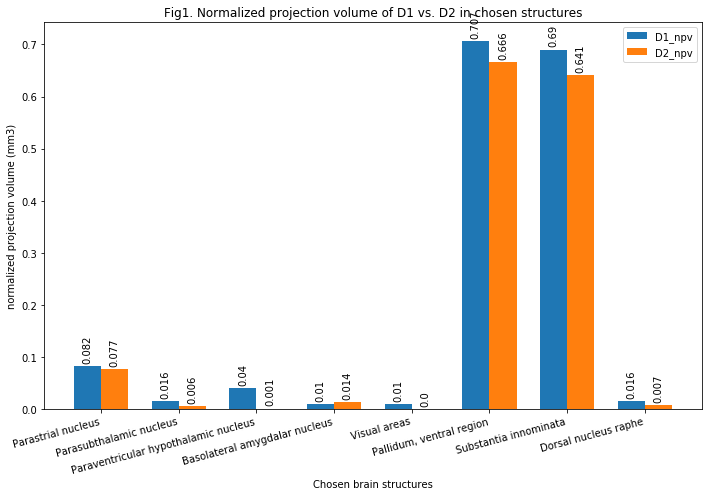

In [25]:
searchfor = ['\\bPS\\b','\\bPSTN\\b','\\bPVH\\b',
             '\\bBLA\\b','\\bVIS\\b','\\bPALv\\b',
             '\\bSI\\b','\\bDR\\b']

to_plot = dataset[dataset.structure_acronym.str.contains('|'.join(searchfor))
       ].reset_index().drop('index',axis=1).set_index('structure_acronym').reindex (
        ['PS','PSTN','PVH','BLA','VIS','PALv','SI','DR'])



labels = to_plot['structure_name']
D1_normalized_projection_volume = to_plot['D1_npv']
D2_normalized_projection_volume = to_plot['D2_npv']

x = np.arange(len(labels))  # the label locations
width = .35# the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, round(D1_normalized_projection_volume,3), width, label='D1_npv')
rects2 = ax.bar(x + width/2, round(D2_normalized_projection_volume,3), width, label='D2_npv')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized projection volume (mm3)')
ax.set_title('Fig1. Normalized projection volume of D1 vs. D2 in chosen structures')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=15, ha='right')
ax.set_xlabel('Chosen brain structures')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(5,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='right', va='bottom', rotation=90)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Figure 2 is a bar plot of the normalized_projection_density for the parent structures of these chosen brain structures. 

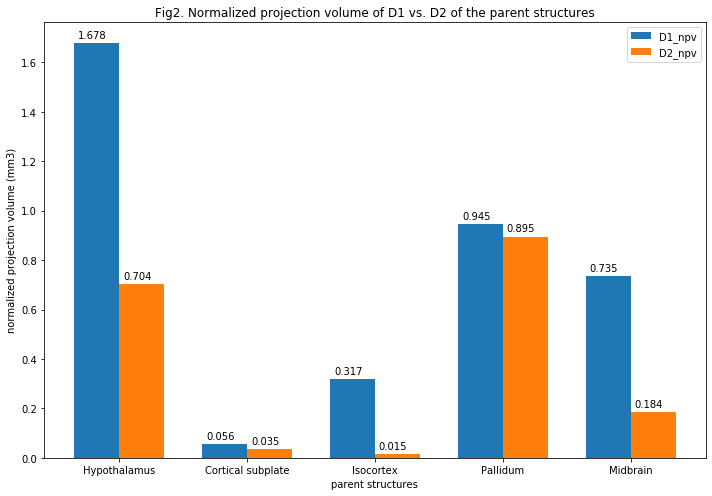

In [26]:
searchfor = ['\\bHY\\b','\\bCTXsp\\b','\\bIsocortex\\b','\\bPAL\\b','\\bMB\\b']
to_plot = dataset[dataset.structure_acronym.str.contains('|'.join(searchfor))
           ].reset_index().drop('index',axis=1).set_index('structure_acronym').reindex ([
           'HY','CTXsp','Isocortex','PAL','MB'])

labels = to_plot['structure_name']
D1_normalized_projection_volume = to_plot['D1_npv']
D2_normalized_projection_volume = to_plot['D2_npv']

x = np.arange(len(labels))  # the label locations
width = .35# the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, round(D1_normalized_projection_volume,3), width, label='D1_npv')
rects2 = ax.bar(x + width/2, round(D2_normalized_projection_volume,3), width, label='D2_npv')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized projection volume (mm3)')
ax.set_title('Fig2. Normalized projection volume of D1 vs. D2 of the parent structures')
ax.set_xticks(x)
ax.set_xticklabels(labels, ha='center')
ax.set_xlabel('parent structures')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(10,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='right', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Figure 3 visualises the Δ(normalized_projection_density) in a bar plot for the chosen brain structures. 


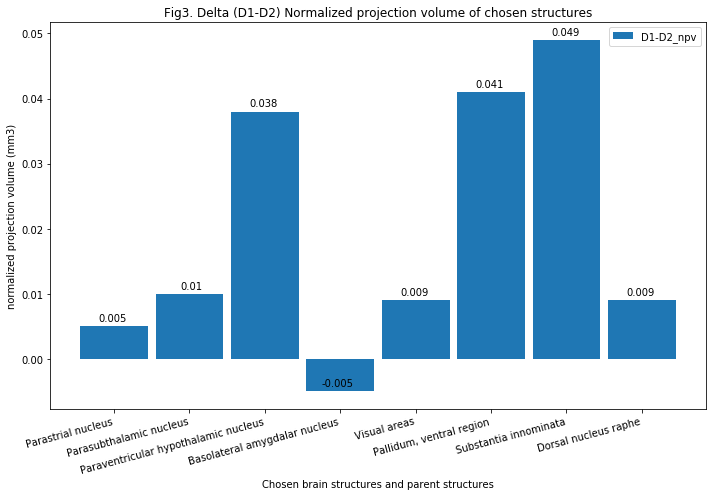

In [27]:
searchfor = ['\\bPS\\b','\\bPSTN\\b','\\bPVH\\b',
             '\\bBLA\\b','\\bVIS\\b','\\bPALv\\b',
             '\\bSI\\b','\\bDR\\b']

to_plot = dataset[dataset.structure_acronym.str.contains('|'.join(searchfor))
       ].reset_index().drop('index',axis=1).set_index('structure_acronym').reindex (
        ['PS','PSTN','PVH','BLA','VIS','PALv','SI','DR'])

labels = to_plot['structure_name']
Delta_normalized_projection_volume = to_plot['D1-D2_npv']

x = np.arange(len(labels))  # the label locations
width = .9 # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rect = ax.bar(x, round(Delta_normalized_projection_volume,3), width, label='D1-D2_npv')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized projection volume (mm3)')
ax.set_title('Fig3. Delta (D1-D2) Normalized projection volume of chosen structures')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=15, ha='right')
ax.set_xlabel('Chosen brain structures and parent structures')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(13,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='right', va='bottom')


autolabel(rect)

fig.tight_layout()
plt.show()

Figure 4 shows the Δ(normalized_projection_density) for the parent structures. The x-axis for these Figures is the brain regions, while the y-axis are the normalized_projection_density (mm3). 


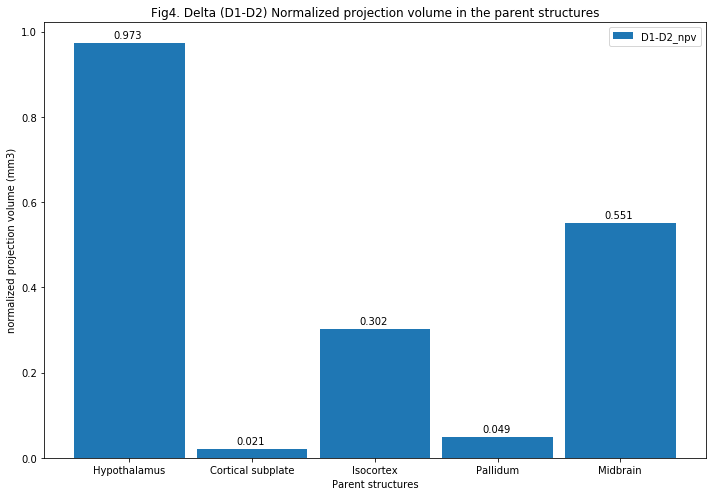

In [28]:
searchfor = ['\\bHY\\b','\\bCTXsp\\b','\\bIsocortex\\b','\\bPAL\\b','\\bMB\\b']
to_plot = dataset[dataset.structure_acronym.str.contains('|'.join(searchfor))
           ].reset_index().drop('index',axis=1).set_index('structure_acronym').reindex ([
           'HY','CTXsp','Isocortex','PAL','MB'])

labels = to_plot['structure_name']
Delta_normalized_projection_volume = to_plot['D1-D2_npv']

x = np.arange(len(labels))  # the label locations
width = .9 # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rect = ax.bar(x, round(Delta_normalized_projection_volume,3), width, label='D1-D2_npv')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('normalized projection volume (mm3)')
ax.set_title('Fig4. Delta (D1-D2) Normalized projection volume in the parent structures')
ax.set_xticks(x)
ax.set_xticklabels(labels, ha='center')
ax.set_xlabel('Parent structures')
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(13,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='right', va='bottom')


autolabel(rect)

fig.tight_layout()
plt.show()

Figure 5 and 6 show a heat map to compare the normalized_projection_density for the chosen brain regions for all 5 experiments (3 from D1 and 2 for D2 mice) and the normalized_projection_density for the parent structures respectively.

fig5. This heatmap compares the normalized projection volumes of chosen structures across experiments and D1 D2.

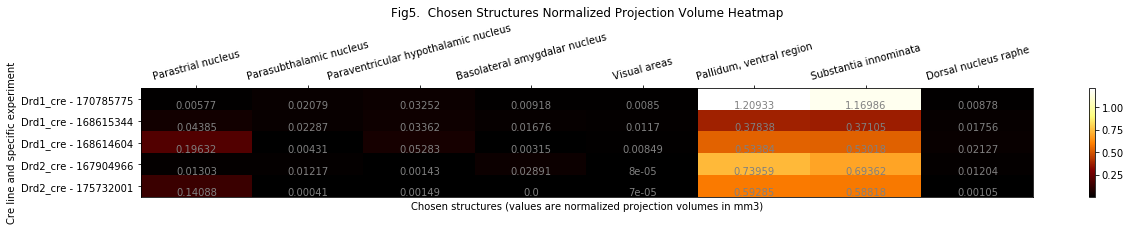

In [29]:
# ALL HEMISPHEREs (LEFT, RIGHT, BOTH)
# chosen experiments as explained above

searchfor = ['\\bPS\\b','\\bPSTN\\b','\\bPVH\\b',
             '\\bBLA\\b','\\bVIS\\b','\\bPALv\\b',
             '\\bSI\\b','\\bDR\\b']

to_plot = dataset[dataset.structure_acronym.str.contains('|'.join(searchfor))
       ].reset_index().drop('index',axis=1).set_index('structure_acronym').reindex (
        ['PS','PSTN','PVH','BLA','VIS','PALv','SI','DR'])

pm = mcc.get_projection_matrix(experiment_ids = [170785775,168615344,168614604,167904966,175732001],
                               projection_structure_ids=to_plot['structure_id'],
                               parameter = 'normalized_projection_volume',
                               hemisphere_ids = [3])

row_labels = ['Drd1_cre - 170785775','Drd1_cre - 168615344',
              'Drd1_cre - 168614604','Drd2_cre - 167904966','Drd2_cre - 175732001']
column_labels = pd.DataFrame(structure_tree.nodes(pd.DataFrame(pm['columns'])['structure_id']))['name']
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(20,2))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        text = ax.text(j+0.5, i+0.8, round(matrix[i, j],5),
                       ha="center", va="center", color="grey")

ax.set_ylabel('Cre line and specific experiment')
plt.title('Fig5.  Chosen Structures Normalized Projection Volume Heatmap')
ax.set_xlabel('Chosen structures (values are normalized projection volumes in mm3)')
plt.xticks(rotation=15)
plt.colorbar(heatmap)


plt.show()

fig.6 This heatmap compares the normalized projection volumes of the parent structures across experiments and D1 D2.

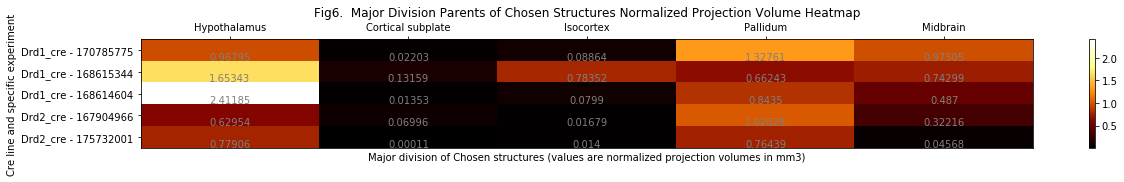

In [30]:
# ALL HEMISPHEREs (LEFT, RIGHT, BOTH)
# chosen experiments as explained above

searchfor = ['\\bHY\\b','\\bCTXsp\\b','\\bIsocortex\\b','\\bPAL\\b','\\bMB\\b']
to_plot = dataset[dataset.structure_acronym.str.contains('|'.join(searchfor))
           ].reset_index().drop('index',axis=1).set_index('structure_acronym').reindex ([
           'HY','CTXsp','Isocortex','PAL','MB'])

pm = mcc.get_projection_matrix(experiment_ids = [170785775,168615344,168614604,167904966,175732001],
                               projection_structure_ids=to_plot['structure_id'],
                               parameter = 'normalized_projection_volume',
                               hemisphere_ids = [3])

row_labels = ['Drd1_cre - 170785775','Drd1_cre - 168615344',
              'Drd1_cre - 168614604','Drd2_cre - 167904966','Drd2_cre - 175732001']
column_labels = pd.DataFrame(structure_tree.nodes(pd.DataFrame(pm['columns'])['structure_id']))['name']
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(20,2))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        text = ax.text(j+0.5, i+0.8, round(matrix[i, j],5),
                       ha="center", va="center", color="grey")

ax.set_ylabel('Cre line and specific experiment')
plt.title('Fig6.  Major Division Parents of Chosen Structures Normalized Projection Volume Heatmap')
ax.set_xlabel('Major division of Chosen structures (values are normalized projection volumes in mm3)')
plt.xticks()
plt.colorbar(heatmap)

plt.show()

Figure 7 was constructed to further validate that the projection densities were different between D1 and D2 cre but similar within the experiments for D1 and D2, a composite of all the intensities from all the coronal sections was superimposed. We can see from the fluorescence signal that the three experiments for D1 are similar and the two experiments from D2 are similar, while the D1 and D2 groups as a whole are different.

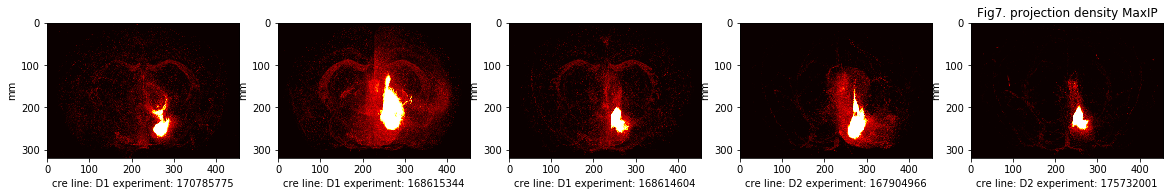

In [31]:
experiment_ids = [170785775,168615344,168614604,167904966,175732001]
cre_lines = ['D1','D1','D1','D2','D2']

f, ax = plt.subplots(1,5, figsize=(20, 15))

count=0
for ID in experiment_ids:
    # projection density: number of projecting pixels / voxel volume
    pd, pd_info = mcc.get_projection_density(ID)
    pd_mip = pd.max(axis=0)

    ax[count].imshow(pd_mip, cmap='hot', aspect='equal')
    ax[count].set_xlabel("cre line: " + cre_lines[count] + " experiment: " +str(ID))
    ax[count].set_ylabel('mm')
    count+=1

plt.title("Fig7. projection density MaxIP")
plt.show()

The following code takes averages of the experimental expression data. Then, using the averages of the excitatory and inhibitory neurons, a ratio is found that represents the overal excitability of a structure in the mouse brain.

Table 2 shows the ratio of AMPA and GABAA expression for the parent brain regions and the AMPA/GABAA ratios.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
manifest = 'connectivity/mouse_connectivity_manifest.json'
mcc = MouseConnectivityCache(manifest_file=manifest)
structure_tree = mcc.get_structure_tree()


import urllib.request # default library for requesting data from URLs
import xml.etree.ElementTree as ET
import io

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
manifest = 'connectivity/mouse_connectivity_manifest.json'
mcc = MouseConnectivityCache(manifest_file=manifest)
structure_tree = mcc.get_structure_tree()


import urllib.request # default library for requesting data from URLs
import xml.etree.ElementTree as ET
import io

In [34]:
GABA_df['averages'] = GABA_df.mean(axis=1)
AMPA_df['averages'] = AMPA_df.mean(axis=1)
ratio_df = pd.DataFrame()
ratio_df['GABA averages'] = GABA_df['averages']
ratio_df['AMPA averages'] = AMPA_df['averages']
ratio_df['E/I Ratio'] = ratio_df['AMPA averages'].div(ratio_df['GABA averages'], axis=0)
print('Table 2')
ratio_df

Table 2


,GABA averages,AMPA averages,E/I Ratio
names,,,
Midbrain,5.796164,12.927901,2.230424
Isocortex,7.447565,21.076267,2.829954
Cortical subplate,6.288683,23.073967,3.669126
Pallidum,5.380325,14.762647,2.743821
Hypothalamus,5.898898,14.782356,2.505952


The following cell plots the average expression for each parent structure and shows the clear distinciton between excitability in the neurons of these chosen structures versus how inhibitable they are.

Figure 8 is a heatmap to compare the E/I ratios for the parent structures

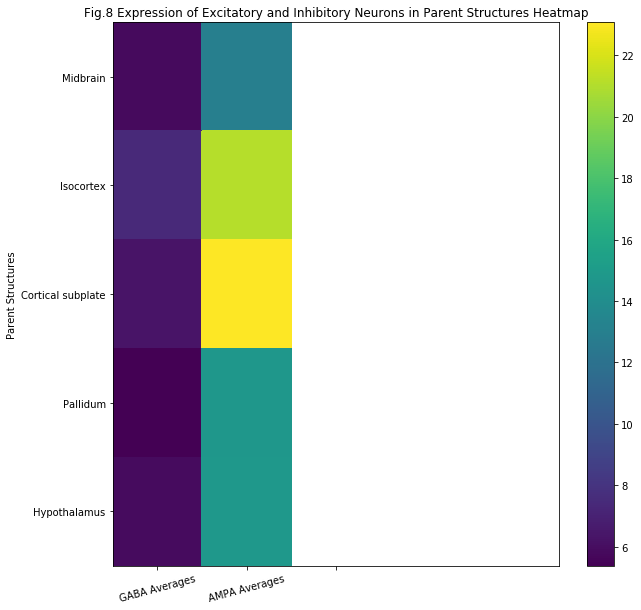

In [35]:
row_labels = ratio_df.index
column_labels = ['GABA Averages','AMPA Averages']

matrix = [list(ratio_df['GABA averages']),list(ratio_df['AMPA averages'])]
matrix = list(map(list, zip(*matrix)))
fig, ax = plt.subplots(figsize=(10,10))
heatmap = ax.pcolor(matrix)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(ratio_df.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(ratio_df.shape[0])+0.5, minor=False)

ax.set_xlim([0, len(matrix)])
ax.set_ylim([0, len(ratio_df.index)])        

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_bottom()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

#for i in range(len(row_labels)):
#    text = ax.text(j+0.5, i+0.8, round(row_labels,5),
#                    ha="center", va="center", color="grey")
#for j in range(len(column_labels)):
#    text = ax.text(j+0.5, i+0.8, round(column_labels,5),
#                   ha="center", va="center", color="grey")

ax.set_ylabel('Parent Structures')
plt.title('Fig.8 Expression of Excitatory and Inhibitory Neurons in Parent Structures Heatmap')
plt.xticks(rotation=15)
plt.colorbar(heatmap)


plt.show()

The following cell plots the excitability/inhibitory expression ratio and compares the excitability of the chosen structures, all of which are signiifcantly high enough to be considered more excitable than not.

Figure 9 visualises them as a bar graph.

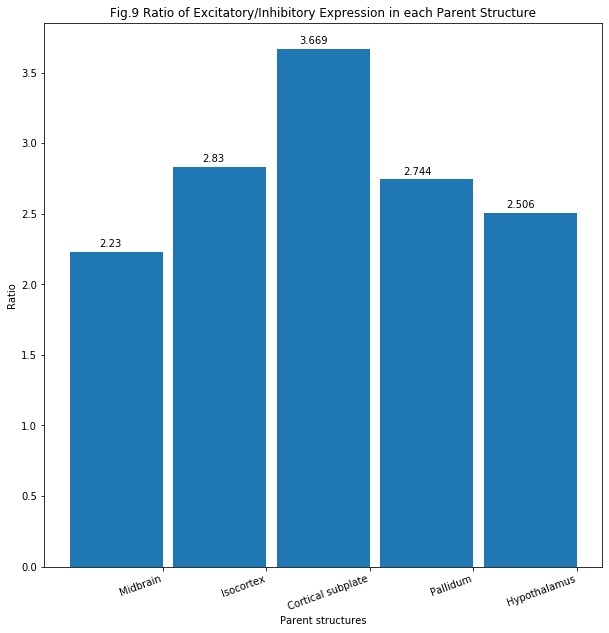

In [36]:
labels = ratio_df.index
x = np.arange(len(labels))  # the label locations
width = .9 # the width of the bars

fig, ax = plt.subplots(figsize=(10,10))
rect = ax.bar(x - width/2, round(ratio_df['E/I Ratio'], 3), width)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio')
ax.set_title('Fig.9 Ratio of Excitatory/Inhibitory Expression in each Parent Structure')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 20, ha='right')
ax.set_xlabel('Parent structures')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(5,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='right', va='bottom')
autolabel(rect)

The normalized_projection_density for all the chosen brain regions were compared using MANOVA test, however the determinant was 0 because some sub-brian regions had a normalized_projection_density of 0. We hence, went on to run a MANOVA test on the parent regions that these subregions were a part of and the chosen brain regions themselves. The MANOVA test was chosen as it tests for the difference of two or more vectors of means. We are working on the assumption that the samples are normally distributed and randomly chosen, and that the population covariances across the groups are the same. However, this test is also robust against violations of said assumptions as long as there are not many outliers.

The periventricular region of the hypothalamus is implicated in analgesia. Young and Chambi show that the electrical stimulation of the periventricular nucleus causes pain relief. Another study by Ring et. al. showed that patients with a higher level of depressive behavior had higher pain sensitivity. From the normalized_projection_volume, D1 cells project more to the periventricular nucleus while D2 cells project less. In depressive patients, when the pain sensitivity increases, it would allude that these D1 MSNs of the NAc are causing disinhibition of the periventricular nucleus which imparts pain relief. With D1 MSN activity decreasing and D2 increasing in depression, D2 MSN could be directly inhibiting the periventricular nucleus resulting in the increased pain sensitivity. 

Rubinow et al. showed an increase in the number of cells in the BLA. Sharp et. al. convincingly showed that there is an increased excitability of the BLA which is heavily implicated in anxiety and fear- related such a depression as discussed by Lim et. al. in their stress-induced depression model of mice. From the Δ(normalized_projection_density) data, D1 MSNs are projecting more strongly to the BLA than the D2. In depressed animals, D2 MSN activity takes over D1 MSN neurons. Because there are fewer projections from the D2 to the BLA than the D1, there is less inhibition of the BLA and this account for the hyperexcitability of the BLA neurons imparting anxiety and fear related disorders such as depression.

Luo el. al shows that there is a strong link between the dorsal raphe nucleus 5-HT neurons and reward processing. On the other hand, Michelsen, K, et al. alludes to neuroplasticity in the dorsal raphe nucleus that potentially explains major depression. According to our data, the D1 projections to the midbrain are significantly higher than those of D2. With the altered activity of these neurons in depressed patients as shown by Chase et.al., the midbrain receives drastically different inputs from these neurons and could be involved in implicating this neuroplasticity.

While Knowland et.al demonstrates how D1 and D2 MSNs affect the neural circuitry of the ventral pallidum (VP), the mechanism is not clear. From our data, the normalised projection density of D1 and D2 to the VP, are very similar in numbers. In depression, D2 takes over D1 and there is a shift in the control at the VP. This dataset provides insight into the potential shift in the control of VP from D1 to D2 in depressed animals. 

Li et.al. suggests that there is a decrease in color perception in depressed patients. V4 has been implicated to be important in color perception (Roe et.al.) As from our data the D1 MSNs strongly project to the visual cortex and potentially play a role in modulation of the visual areas and color perceptions. However the D2 MSNs barely project to the visual cortex. During depression, with significantly decreased inputs from the D1 MSNs, the visual cortex processing of color might be impaired as the visual cortex loses one of its major inputs. 


All the brain regions investigated had an e/i ratio greater than 2, indicating that they majorly have excitatory inputs. While the inputs examined in this study are inhibitory, it is worthwhile to mention that while these brain regions receive both inhibitory and excitatory projections, with major expression of the glutamate receptor, AMPA. The combined prolonged effect of the D1 and D2 projections mentioned before might lower the e/i ratio due to long-term depression of neurons, therefore playing a role in bringing about the depressive phenotypes.


## Conclusion & Discussion

We are making many assumptions, like applying human depression phenotypes and corresponding human brain regions to mice brain regions. Through the normalised_projection_volume data we were able to compare the projection of D1 versus D2 MSNs to brain regions we identified as being important for the various phenotypes associated with depression. Through primary literature, we identified the alterations these regions go through in depressed humans and human models, then hypothesised circuit changes that result from D1 and D2 activity changes in response to depression. The biggest limitation of this study is that D1 and D2 MSNs are not the only inputs our brain regions of interest receive. The brain circuitry is complex and cannot simply be explained by modification of a few synapses. However, these hypotheses could surely be one of the many changes that occur eventually resulting in these different phenotypes. Additionally it would also be interesting to look at electrophysiology data for the D1 and D2 MSNs and study how similar or different they are. It will allow us to investigate if the increase in activity of one can compensate for the decrease in other. We could also do anterograde tracing for D1 and D2 in the same animal and further investigate if they are projecting to the same cell by using CRE and FLP recombinase. This will provide further insight into the circuit actions of these neurons and their role in depression and its various phenotypes. 

## Reflection

Not a lot more than we could handle but the project is very challenging. It is by far the most stressful and challenging of the projects I have done. I was not able to gather enough coding skills to engage with the data sets and pull the right data to be able to answer a novel question.

Trying to work with a limited data set and drawing conclusions using statistics I was not familiar with was difficult. In addition, the background research alone required a certain degree in familiarity with the subject matter (D1/D2 receptors) that I had to quickly catch up on. Overall, I put an inordinate amount of time and effort in this project that I was not expecting, but I am proud of the final product, despite the numerous hurdles we had to overcome.


## Citations

1. Creed, Meaghan, et al. "Convergence of reinforcing and anhedonic cocaine effects in the ventral pallidum." Neuron 92.1 (2016): 214-226. https://www.ncbi.nlm.nih.gov/pubmed/27667004
2. Knowland, Daniel, and Byung Kook Lim. "Circuit-based frameworks of depressive behaviors: The role of reward circuitry and beyond." Pharmacology Biochemistry and Behavior 174 (2018): 42-52. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6340396/#R23 
3. Knowland, Daniel, et al. "Distinct ventral pallidal neural populations mediate separate symptoms of depression." Cell 170.2 (2017): 284-297. https://www.ncbi.nlm.nih.gov/pubmed/28689640
4. Li, Da-Ke, et al. "Depressive symptoms are associated with color vision but not olfactory function in patients with Parkinson’s disease." The Journal of neuropsychiatry and clinical neurosciences 30.2 (2018): 122-129. https://www.ncbi.nlm.nih.gov/pubmed/29458280

5. Lim, Byung Kook, et al. "Anhedonia requires MC4R-mediated synaptic adaptations in nucleus accumbens." Nature 487.7406 (2012): 183-189. https://www.ncbi.nlm.nih.gov/pubmed/22785313

6. Luo, Minmin, Jingfeng Zhou, and Zhixiang Liu. "Reward processing by the dorsal raphe nucleus: 5-HT and beyond." Learning & Memory 22.9 (2015): 452-460. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4561406/ 

7. “Major Depression.” National Institute of Mental Health, U.S. Department of Health and Human Services, www.nimh.nih.gov/health/statistics/major-depression.shtml.
8. Michelsen, Kimmo A., Christoph Schmitz, and Harry WM Steinbusch. "The dorsal raphe nucleus—from silver stainings to a role in depression." Brain research reviews 55.2 (2007): 329-342. https://www.sciencedirect.com/science/article/abs/pii/S0165017307000161

9. Michelsen, Kimmo A., Jos Prickaerts, and Harry WM Steinbusch. "The dorsal raphe nucleus and serotonin: implications for neuroplasticity linked to major depression and Alzheimer's disease." Progress in brain research 172 (2008): 233-264. https://www.ncbi.nlm.nih.gov/pubmed/18772036

10. Ring, Joshua, et al. “Depression and Functional Outcomes in Patients Presenting to the Emergency Department With Low Back Pain.” Academic Emergency Medicine, 2020, doi:10.1111/acem.13957. https://www.ncbi.nlm.nih.gov/pubmed/32153095

11. Roe, Anna W., et al. "Toward a unified theory of visual area V4." Neuron 74.1 (2012): 12-29. https://www.ncbi.nlm.nih.gov/pubmed/22500626

12. Rubinow, Marisa J., et al. "Basolateral amygdala volume and cell numbers in major depressive disorder: a postmortem stereological study." Brain Structure and Function 221.1 (2016): 171-184. https://www.ncbi.nlm.nih.gov/pubmed/25287512

13. Sharp, B. M. "Basolateral amygdala and stress-induced hyperexcitability affect motivated behaviors and addiction." Translational psychiatry 7.8 (2017): 

14. Soares-Cunha, Carina, et al. "Nucleus accumbens medium spiny neurons subtypes signal both reward and aversion." Molecular psychiatry (2019): 1-15. https://www.ncbi.nlm.nih.gov/pubmed/31462765

15. Young, Ronald F., and V. Israel Chambi. "Pain relief by electrical stimulation of the periaqueductal and periventricular gray matter: evidence for a non-opioid mechanism." Journal of neurosurgery 66.3 (1987): 364-371. https://thejns.org/view/journals/j-neurosurg/66/3/article-p364.xml
16. Zhang, Zhi, Y-Y. Jiao, and Q-Q. Sun. "Developmental maturation of excitation and inhibition balance in principal neurons across four layers of somatosensory cortex." Neuroscience 174 (2011): 10-25. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3020261/

